<a href="https://colab.research.google.com/github/Jhernandezh2/MetodosI_JulianaHernandez_MariaCamilaRamirez/blob/main/Comp_Metodos/Finals/Comp_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from scipy.special import lambertw

def find_root_iters(f, x0, h=1e-6, max_iters=50, atol=1e-5, rtol=1e-5):

    def derivada_central(f, x, h=1e-6):
        return (f(x + h) - f(x - h)) / (2 * h)

    x = x0
    for i in range(max_iters):
        fx = f(x)
        dfx = derivada_central(f, x, h)

        if np.isclose(0., fx, atol=atol, rtol=rtol):
            return x, i + 1

        if abs(dfx) < atol:
            raise ValueError("La derivada es demasiado pequeña, posible división por cero.")


        x_new = x - fx / dfx

        x = x_new

    raise ValueError("El método no ha convergido después de {} iteraciones.".format(max_iters))


f = lambda x: x * np.exp(x) - 5

#Prueba

root, iterations = find_root_iters(f, x0=0.4)
print(f"Raíz: {root}, en {iterations} iteraciones")

exact_solution = lambertw(5).real
print(f"Solución exacta: {exact_solution}")


Raíz: 1.3267247377055489, en 7 iteraciones
Solución exacta: 1.3267246652422002


In [ ]:


@np.vectorize
def find_root(f, x0, h=1e-6, max_iters=50, atol=1e-5, rtol=1e-5):
    root, _ = find_root_iters(f, x0, h, max_iters, atol, rtol)
    return root


f = lambda x: x * np.exp(x) - 5


x0_array = np.array([0.1, 0.5, 1.0])


from scipy.special import lambertw
all(np.isclose(
    find_root(lambda x: x**3-0.4,[0.4,0.9j]),
    [0.7368+0.j, -0.36840314+0.63809297j]
))

# Usar la nueva función find_root para obtener las raíces
roots = find_root(f, x0_array)
print(f"Raíces: {roots}")

Raíces: [1.32672502 1.32672467 1.32672467]


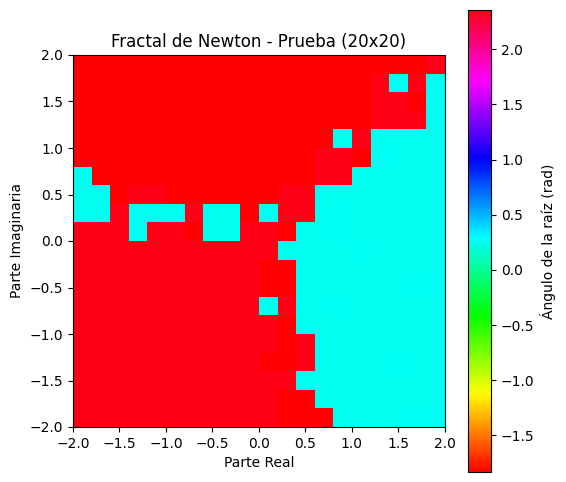

ValueError: La derivada es demasiado pequeña.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def f(z):
    return z**3 - (1 + 1j)

def df(z):
    return 3*z**2

def find_root_iters_complex(f, df, z0, max_iters=50, atol=1e-5, rtol=1e-5):
    z = z0
    for i in range(max_iters):
        fz = f(z)
        dfz = df(z)

        if np.isclose(fz, 0, atol=atol, rtol=rtol):
            return z

        if abs(dfz) < atol:
            raise ValueError("La derivada es demasiado pequeña.")

        z = z - fz / dfz

    return z

@np.vectorize
def find_root_complex(z0, max_iters=50, atol=1e-5, rtol=1e-5):
    return find_root_iters_complex(f, df, z0, max_iters, atol, rtol)

def generate_grid(size):
    x = np.linspace(-2, 2, size)
    y = np.linspace(-2, 2, size)
    x, y = np.meshgrid(x, y)
    return x + 1j * y

# Función para generar el fractal
def generate_fractal(size=20, max_iters=50):
    z_grid = generate_grid(size)
    roots = find_root_complex(z_grid, max_iters=max_iters)
    angles = np.angle(roots)
    return angles

angles_test = generate_fractal(size=20)


plt.figure(figsize=(6,6))
plt.imshow(angles_test, extent=[-2, 2, -2, 2], cmap='hsv')
plt.colorbar(label="Ángulo de la raíz (rad)")
plt.title("Fractal de Newton - Prueba (20x20)")
plt.xlabel("Parte Real")
plt.ylabel("Parte Imaginaria")
plt.show()


angles_final = generate_fractal(size=150)

# Graficar los resultados finales
plt.figure(figsize=(6,6))
plt.imshow(angles_final, extent=[-2, 2, -2, 2], cmap='hsv')
plt.colorbar(label="Ángulo de la raíz (rad)")
plt.title("Fractal de Newton (150x150)")
plt.xlabel("Parte Real")
plt.ylabel("Parte Imaginaria")
plt.show()


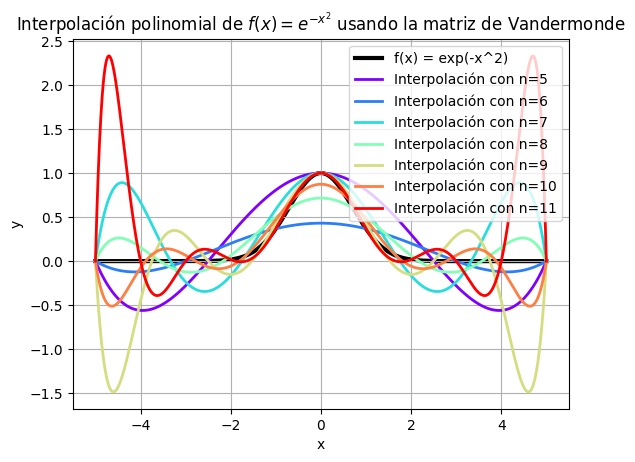

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return np.exp(-x**2)

n_values = range(5, 12)
x_continuo = np.linspace(-5, 5, 1000)


cmap = plt.get_cmap("rainbow")
colors = cmap(np.linspace(0, 1, len(n_values)))


plt.plot(x_continuo, f(x_continuo), 'k', lw=3, label='f(x) = exp(-x^2)', zorder=-1)


for i, n in enumerate(n_values):

    x = np.linspace(-5, 5, n)
    y = f(x)

    V = np.vander(x)

    a = np.linalg.inv(V) @ y

    p = np.poly1d(a)

    y_interp = p(x_continuo)


    plt.plot(x_continuo, y_interp, color=colors[i], lw=2, label=f'Interpolación con n={n}')


plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Interpolación polinomial de $f(x) = e^{-x^2}$ usando la matriz de Vandermonde')
plt.grid(True)
plt.show()


<ipython-input-12-9cf20ab6f08d>:32: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  DAn, _ = quad(lambda x: np.abs(f(x) - p(x)), -5, 5)


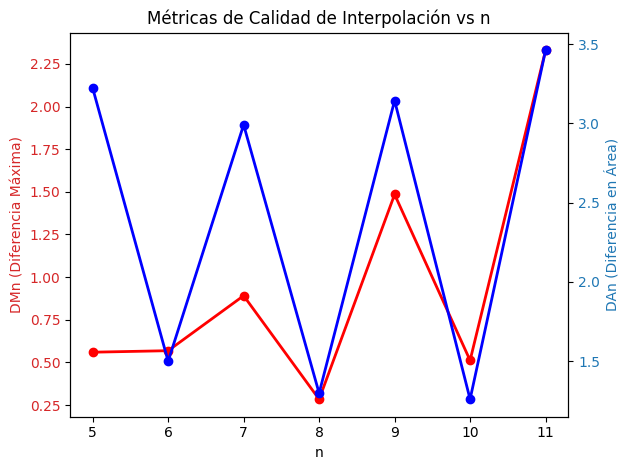

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

def f(x):
    return np.exp(-x**2)

def error_abs(f, p, x):
    return np.abs(f(x) - p(x))

n_values = range(5, 12)

x_continuo = np.linspace(-5, 5, 1000)

DM_values = []
DA_values = []


for n in n_values:

    x = np.linspace(-5, 5, n)
    y = f(x)

    V = np.vander(x)
    a = np.linalg.inv(V) @ y
    p = np.poly1d(a)


    DMn = np.max(np.abs(f(x_continuo) - p(x_continuo)))
    DM_values.append(DMn)

    DAn, _ = quad(lambda x: np.abs(f(x) - p(x)), -5, 5)
    DA_values.append(DAn)


fig, ax1 = plt.subplots()


ax1.set_xlabel('n')
ax1.set_ylabel('DMn (Diferencia Máxima)', color='tab:red')
ax1.plot(n_values, DM_values, 'r', marker='o', label='DMn', lw=2)
ax1.tick_params(axis='y', labelcolor='tab:red')


ax2 = ax1.twinx()
ax2.set_ylabel('DAn (Diferencia en Área)', color='tab:blue')
ax2.plot(n_values, DA_values, 'b', marker='o', label='DAn', lw=2)
ax2.tick_params(axis='y', labelcolor='tab:blue')


plt.title('Métricas de Calidad de Interpolación vs n')

fig.tight_layout()
plt.show()


DMn: Mide el peor error en el intervalo y debería disminuir cuando n aumenta, ya que más puntos permiten una mejor aproximación.

DAn: Mide el error acumulado en todo el intervalo y también debería disminuir cuando n aumenta, para que el polinomio de interpolación se ajuste mejor a la función.

